# 何ら根拠のないルールに則って整数を並べた時、素数はどのような形に並ぶのだろうか？

## No.4 三次元空間にプロットしてみる その3


## 関数諸々  

このファイル内で共通で使う関数です。  
最初にこのセルを実行しておいて下さい

In [1]:
import numpy as np

def choice_prime_num(arr):
    """Extract prime numbers"""
    if isinstance(arr, np.ndarray):
        arr = arr.tolist()
    if 0 in arr:
        arr.remove(0)
    if 1 in arr:
        arr.remove(1)
    prime = []
    _min = min(arr)
    _max = max(arr)
    while _min <= np.sqrt(_max):
        _min = min(arr)
        prime.append(_min)
        for i in arr:
            if i != _min and i % _min == 0:
                arr.remove(i)
        arr.remove(_min)
    prime.extend(arr)

    return prime

def divied_colors(int_range, prime_num):
    colors = []
    for num in range(len(int_range)):
        if num in prime_num:
            colors.append('red')
        elif num % 2 == 0:
            colors.append('darkslateblue')
        else:
            colors.append('mediumseagreen')
    return colors


def make_plot_arr(arr1, arr2, theta):
    radius = np.sqrt(arr1[0]**2 + arr1[1]**2)
    arr = np.array([radius, arr2[0], arr2[1]])
    matrix = np.array([
        [np.cos(theta), np.sin(theta), 0],
        [-np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

    res =  matrix.dot(arr)
    return res


## 複素数生成用の数式を替えてみる  

回転の要領はNo3ファイルと同じで、複素数を生成する式を変更し、さらにそれらの実数部、虚数部を（それぞれに対応した数で）整数倍します。  

前回の式: $comp\_num = \cos{\theta} + i \sin{\theta}$  


今回の式: $comp\_num = 1 - i^{e n}$  

| n | complex number | real × n | imag × n |
| --- | --- | --- | --- |
| 2 | (1.633255651314819-0.773942685266709j) | 3.266511302629638 | -1.547885370533418 |
| 3 | (0.029435043548055928-0.2408395011359972j) | 0.08830513064416778 | -0.7225185034079916 |
| 4 | (1.1979745601556884+0.9802071584778198j) | 4.7918982406227535 | 3.9208286339112792 |
| ... | ... | ... | ... |

In [2]:
import numpy as np

print("| n | complex number | real × n | imag × n |\n| --- | --- | --- | --- |")
comp_num = lambda n : 1 - 1j**(np.e * n)
for n in range(2, 5):
    comp = comp_num(n)
    arr = [comp, comp.real*n, comp.imag*n]
    print("| {} | {} | {} | {} |".format(n, comp, comp.real*n, comp.imag*n))
print('| ... | ... | ... | ... |\n')

| n | complex number | real × n | imag × n |
| --- | --- | --- | --- |
| 2 | (1.633255651314819-0.773942685266709j) | 3.266511302629638 | -1.547885370533418 |
| 3 | (0.029435043548055928-0.2408395011359972j) | 0.08830513064416778 | -0.7225185034079916 |
| 4 | (1.1979745601556884+0.9802071584778198j) | 4.7918982406227535 | 3.9208286339112792 |
| ... | ... | ... | ... |



<img src="./img/pict_no2.jpg">

それでは、実際に表示させてみます  
まずは、$rad = \frac{e \pi}{2}$

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def plot3d_04(int_range, prime_num, rad):
    colors = divied_colors(int_range, prime_num)
    theta = rad * int_range
    
    comp_num = 1 - 1j ** (np.e * int_range)
    
    ax1_x = np.cos(theta) * int_range
    ax1_y = np.sin(theta) * int_range
    ax1 = np.stack([ax1_x, ax1_y]).T

    ax2_x = comp_num.real * int_range
    ax2_y = comp_num.imag * int_range
    ax2 = np.stack([ax2_x, ax2_y]).T
       
    plots = []
    for arr1, arr2, r in zip(ax1, ax2, theta):
        plots.append(make_plot_arr(arr1, arr2, r))

    cood = np.array(plots).T
    
    fig = plt.figure(figsize=(5, 5))
    ax = Axes3D(fig)
    ax.set_facecolor('aliceblue')
    ax.scatter(cood[0], cood[1], cood[2], s=3, c=colors, alpha=0.5)



<IPython.core.display.Javascript object>


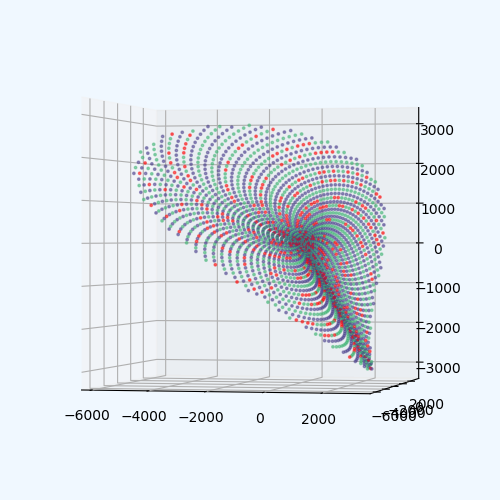

In [4]:
INT_RANGE = np.arange(1, 3000)
PRIME_NUM = np.array(choice_prime_num(INT_RANGE))

rad = (np.e / 2) * np.pi

plot3d_04(INT_RANGE, PRIME_NUM, rad)

円盤を歪ませたような形になりました。  
色々やっていて気付いたのですが、$rad = \frac{e \pi}{2}$は他の数値の時とちょっと違う形になることが多いようです。  
尤も、ここではその理由を探ろうともせず（!?）、他の値を試していきたいと思います  

$rad$の値を替えてみます $(rad = \frac{e^{2 \pi}}{2 \pi^{e}})$

<IPython.core.display.Javascript object>


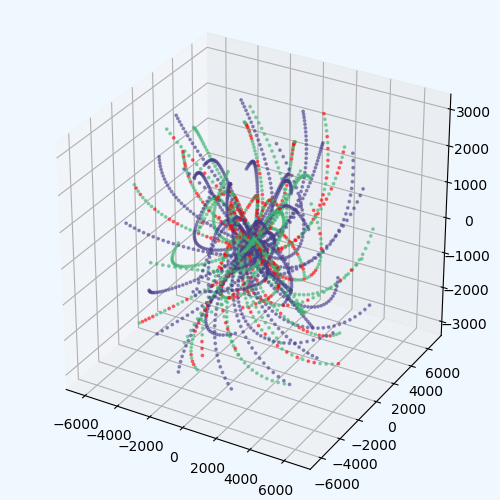

In [5]:
rad = np.e**(2 * np.pi) / (2 * np.pi**np.e)

plot3d_04(INT_RANGE, PRIME_NUM, rad)

ヒモ状です。実はこの$rad$、No2ファイルでも同じくヒモ状になっています。  

次に $rad = \frac{2}{e  \pi}$

<IPython.core.display.Javascript object>


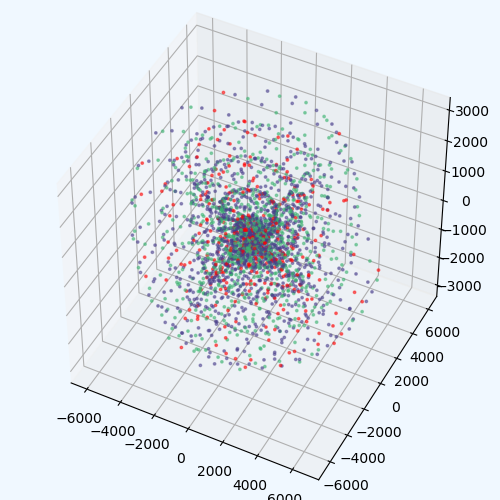

In [8]:
%matplotlib notebook

rad = 2 / (np.e*np.pi)

plot3d_04(INT_RANGE, PRIME_NUM, rad)

縦横方向にクルクル回して観察してみると、渦の構造をよく残しているように見受けられます。  

その他は、比較的特徴のないものが多いですが、幾つか表示しておきます  

$rad = e^{\frac{\pi}{2}}$

<IPython.core.display.Javascript object>


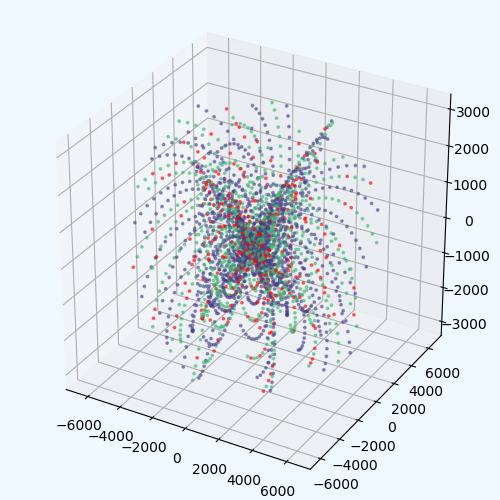

In [9]:
rad = np.exp(np.pi / 2)

plot3d_04(INT_RANGE, PRIME_NUM, rad)

$ rad = \frac{2 \pi^{e}}{e^{-2 \pi}}$

<IPython.core.display.Javascript object>


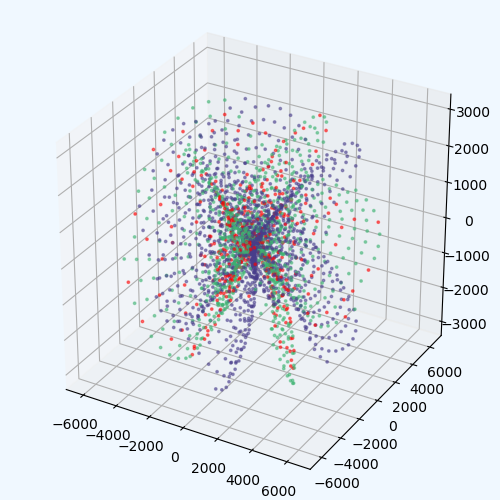

In [10]:
rad = (2 * np.pi**np.e) / (np.e**(-2 * np.pi)) 
plot3d_04(INT_RANGE, PRIME_NUM, rad)

もはや、素数の並び方とか気にしなくなっていますが（汗）… まあ、良いでしょう。

他のパターンも気になるようなら試してみて下さい

<IPython.core.display.Javascript object>


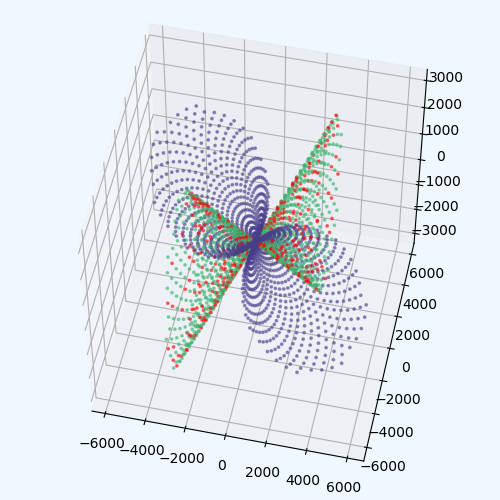

In [6]:
# rad = np.exp(-np.pi)
# rad = np.e
# rad = np.e / (2 * np.pi)
# rad = np.e**(2 * np.pi) / (2 * np.pi**np.e)
# rad = np.e**(np.pi) / (np.pi**np.e)
# rad = (np.pi**np.e) / (np.e**(-np.pi))
# rad = (2 * np.pi) / np.e**2
# rad = np.pi**np.e
# rad = 2**np.e*np.pi
# rad = (2*np.e)**np.pi

## おまけ
rad = np.pi / 2

plot3d_04(INT_RANGE, PRIME_NUM, rad)